# Import the necessary libraries

# Import the necessary libraries

In [2]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))
from telecom_Database_Connector import TelecomDatabaseConnector
from missing_value_checker import MissingValueChecker
from outlier_checker import OutlierChecker
from telecom_user_overview import TelecomUserOverview
from data_size_converter import DataSizeConverter
from eda_analysis import EDAAnalysis




# Load the telecom data from the database

In [3]:
# Import the class from the Python file

# 1. Instantiate the database connector
db_connector = TelecomDatabaseConnector(dbname="telecom_db", user="postgres", password="12345")

# 2. Write a query to fetch data from your database
query = "SELECT * FROM xdr_data LIMIT 10;"

# 3. Fetch the data and store it in a pandas DataFrame
data = db_connector.query_data(query)

# 4. Display the fetched data
# print(data)

# 5. Close the connection when done
db_connector.close_connection()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Bearer Id                                 10 non-null     float64
 1   Start                                     10 non-null     object 
 2   Start ms                                  10 non-null     float64
 3   End                                       10 non-null     object 
 4   End ms                                    10 non-null     float64
 5   Dur. (ms)                                 10 non-null     float64
 6   IMSI                                      10 non-null     float64
 7   MSISDN/Number                             10 non-null     float64
 8   IMEI                                      10 non-null     float64
 9   Last Location Name                        10 non-null     object 
 10  Avg RTT DL (ms)                          

In [4]:
data.describe()
# print(data.columns)

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.000000e+01,10.000000,10.000000,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,5.000000,5.000000,10.000000,...,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
mean,1.310007e+19,382.100000,552.200000,1.182834e+06,2.082012e+14,3.370126e+10,4.571034e+13,69.000000,8.000000,777.600000,...,1.680073e+07,1.120888e+07,1.254776e+07,8.059474e+06,5.580685e+08,8.183213e+06,4.643101e+08,1.051576e+07,4.021279e+07,5.969786e+08
std,3.038214e+16,274.046407,282.670912,2.887791e+05,5.179483e+08,4.171101e+07,2.158009e+13,29.656365,5.656854,1578.427642,...,4.483981e+06,7.312337e+06,4.278408e+06,6.362678e+06,2.798358e+08,6.198674e+06,2.543565e+08,4.054545e+06,1.147913e+07,2.823807e+08
min,1.304243e+19,0.000000,168.000000,8.644820e+05,2.082003e+14,3.365922e+10,3.528151e+13,39.000000,5.000000,6.000000,...,7.234465e+06,1.886295e+06,6.858496e+06,4.152180e+05,4.479622e+07,3.956300e+05,6.485604e+07,4.215763e+06,2.241798e+07,7.056205e+07
25%,1.311448e+19,149.500000,341.000000,9.722842e+05,2.082011e+14,3.366607e+10,3.536921e+13,42.000000,5.000000,17.500000,...,1.540819e+07,3.601633e+06,8.796018e+06,2.364308e+06,3.404885e+08,2.075878e+06,2.323635e+08,7.989591e+06,3.191825e+07,3.739444e+08
50%,1.311448e+19,462.500000,579.500000,1.081824e+06,2.082014e+14,3.369030e+10,3.554181e+13,65.000000,5.000000,33.500000,...,1.738749e+07,1.278022e+07,1.272108e+07,7.501812e+06,6.595218e+08,8.699036e+06,5.322530e+08,1.172353e+07,4.045298e+07,7.039186e+08
75%,1.311448e+19,585.250000,659.500000,1.351699e+06,2.082014e+14,3.373771e+10,3.573878e+13,97.000000,7.000000,64.000000,...,2.011696e+07,1.800882e+07,1.634210e+07,1.147047e+07,7.868802e+08,1.385569e+07,6.289111e+08,1.363654e+07,4.677499e+07,8.283590e+08
max,1.311448e+19,770.000000,960.000000,1.823652e+06,2.082019e+14,3.376349e+10,8.676270e+13,102.000000,18.000000,3845.000000,...,2.138812e+07,1.973518e+07,1.833841e+07,1.798176e+07,8.216713e+08,1.614962e+07,8.036536e+08,1.505514e+07,5.881302e+07,8.616123e+08


# Data cleaning

### Check missing value

In [5]:


# Create an instance of MissingValueChecker
missing_checker = MissingValueChecker(data)

# Check for missing values
missing_values = missing_checker.check_missing()
print("Missing Values Before Filling:\n", missing_values)

# Fill missing values based on datatype (mode for categorical, median for numerical)
missing_checker.fill_missing_with_mean()

# Get the cleaned data after handling missing values
cleaned_data = missing_checker.get_cleaned_data()

# Display the cleaned dataset
print("\nCleaned Data:\n", cleaned_data)



Missing Values Before Filling:
 Nb of sec with 37500B < Vol UL              10
Nb of sec with 125000B < Vol DL             10
TCP UL Retrans. Vol (Bytes)                  9
Nb of sec with 6250B < Vol UL < 37500B       9
Nb of sec with 1250B < Vol UL < 6250B        8
HTTP UL (Bytes)                              8
TCP DL Retrans. Vol (Bytes)                  8
HTTP DL (Bytes)                              8
Nb of sec with 31250B < Vol DL < 125000B     8
Nb of sec with 6250B < Vol DL < 31250B       8
Avg RTT DL (ms)                              5
Avg RTT UL (ms)                              5
dtype: int64
Filled missing values in column: Avg RTT DL (ms)
Filled missing values in column: Avg RTT UL (ms)
Filled missing values in column: TCP DL Retrans. Vol (Bytes)
Filled missing values in column: TCP UL Retrans. Vol (Bytes)
Filled missing values in column: HTTP DL (Bytes)
Filled missing values in column: HTTP UL (Bytes)
Filled missing values in column: Nb of sec with 1250B < Vol UL < 6250B
Fi

c:\Users\wubeshet.abera\Projects\Ten-Academy\Telecom-User-Analysis-Insights\scripts\missing_value_checker.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.data[col].fillna(self.data[col].mean(), inplace=True)


### Check for outlier

In [6]:
# Assuming the xDR data is loaded into xdr_data_df

outlier_checker = OutlierChecker(cleaned_data)

# Replace 'value_column' with the actual column name you want to check for outliers
column_name = 'End ms'  # Example column

# Check for outliers
outliers = outlier_checker.check_outliers(column_name)
print("Outliers in column '{}':\n".format(column_name), outliers)

# Remove outliers from the column
removed_outliers = outlier_checker.remove_outliers(column_name)
print("Removed Outliers:\n", removed_outliers)

# Get the cleaned dataset
cleaned_data = outlier_checker.get_cleaned_data()
print("Cleaned Data:\n", cleaned_data)
print(cleaned_data.columns)



Q1: 341.0, Q3: 659.5, IQR: 318.5, Lower Bound: -136.75, Upper Bound: 1137.25
Detected Outliers: []
Outliers in column 'End ms':
 Series([], Name: End ms, dtype: float64)
Q1: 341.0, Q3: 659.5, IQR: 318.5, Lower Bound: -136.75, Upper Bound: 1137.25
Data after removing outliers:
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
5  1.311448e+19  4/12/2019 21:37     439.0   4/25/2019 8:08   553.0   
6  1.311448e+19   4/13/2019 8:41     612.0   4/25/2019 8:16   168.0   
7  1.304243e+19   4/14/2019 2:11     592.0   4/25/2019 2:26   512.0   
8  1.311448e+19  4/14/2019 12:48     121.0  4/25/2019 10:22   960.0   
9  1.304243e+

### Data size conversion

In [7]:

# Assuming 'data' is the DataFrame fetched from the database

# Define the columns to convert
columns_to_convert = [
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
    'Total UL (Bytes)', 'Total DL (Bytes)', 'Avg Bearer TP DL (kbps)'
]

# Instantiate the class and convert the data sizes in 'data'
converter = DataSizeConverter(data, columns_to_convert)
converter.clean_data()

# Get the cleaned data
cleaned_data = converter.get_cleaned_data()

# Display the cleaned data (now in MB)
print("Here are the clean data: \n",  cleaned_data)


Here are the clean data: 
       Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
5  1.311448e+19  4/12/2019 21:37     439.0   4/25/2019 8:08   553.0   
6  1.311448e+19   4/13/2019 8:41     612.0   4/25/2019 8:16   168.0   
7  1.304243e+19   4/14/2019 2:11     592.0   4/25/2019 2:26   512.0   
8  1.311448e+19  4/14/2019 12:48     121.0  4/25/2019 10:22   960.0   
9  1.304243e+19   4/15/2019 0:32       0.0   4/25/2019 0:40   284.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  

# Overview analysis

Aggregated User Data Overview:
           IMSI  number_of_xdr_sessions  total_session_duration  \
0  2.082003e+14                       1                864482.0   
1  2.082003e+14                       1               1361762.0   
2  2.082010e+14                       1                951292.0   
3  2.082014e+14                       1               1089009.0   
4  2.082014e+14                       1               1321509.0   

   total_dl_data  total_ul_data  total_data_volume  
0     811.167094      21.379447         832.546541  
1     266.845069      26.591909         293.436978  
2     739.431708      56.088463         795.520171  
3     542.772855      36.757292         579.530147  
4     806.835680      41.317194         848.152874  


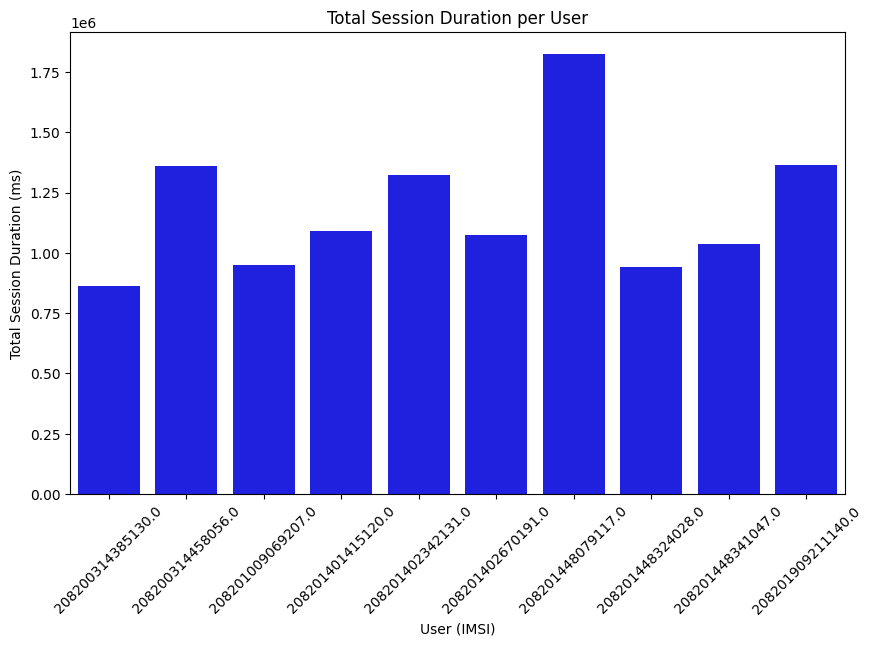

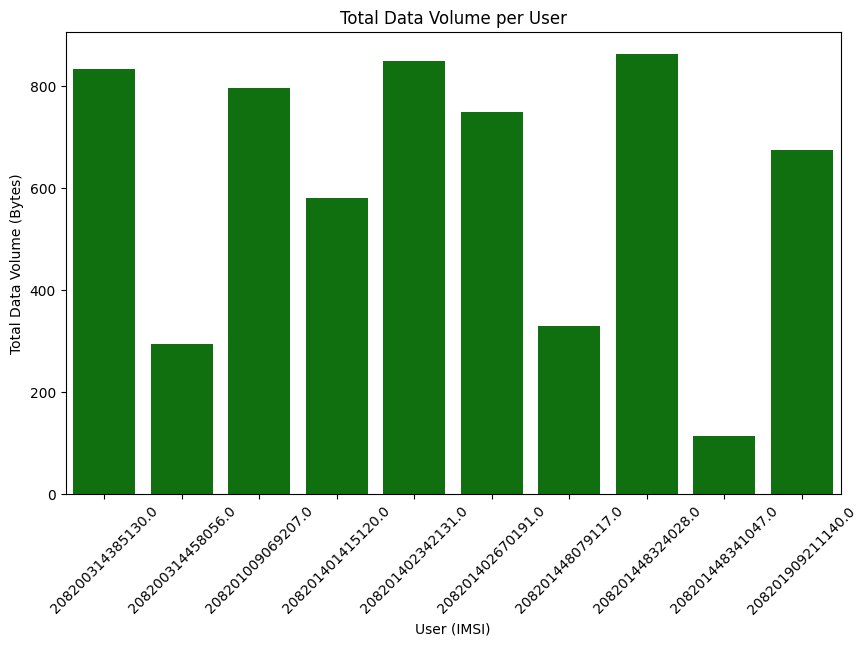

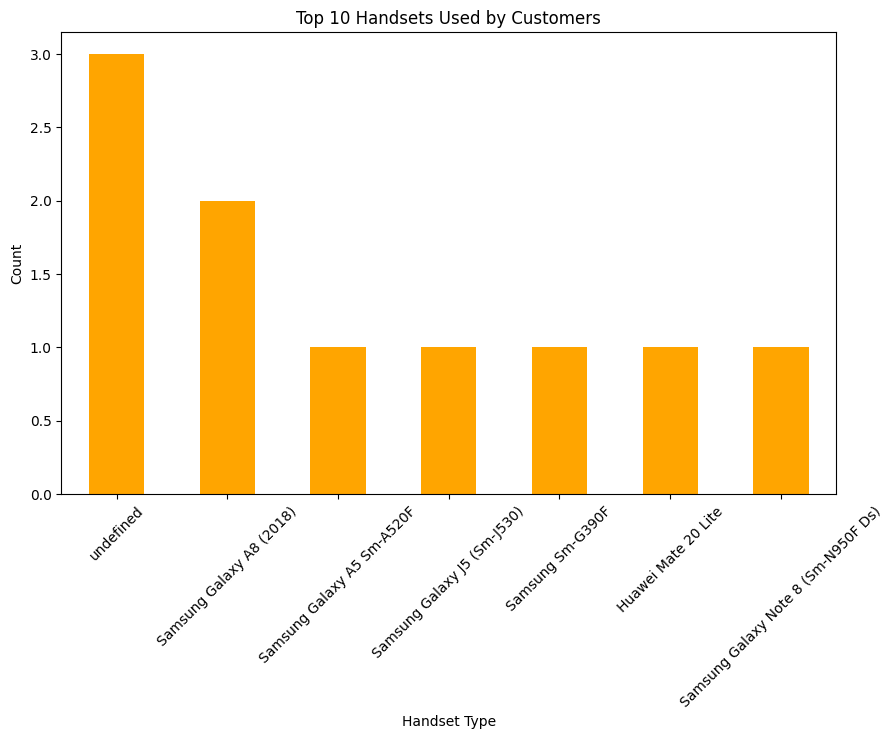

Handset Manufacturer
Samsung      6
undefined    3
Huawei       1
Name: count, dtype: int64


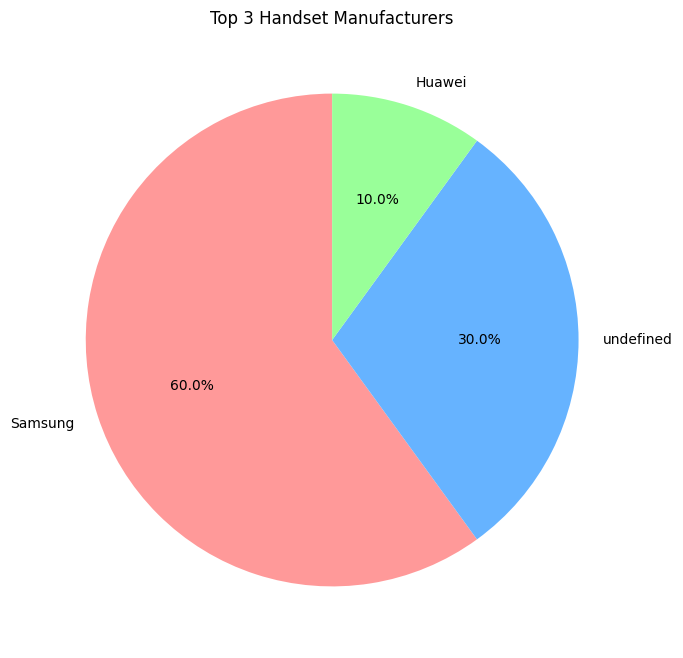

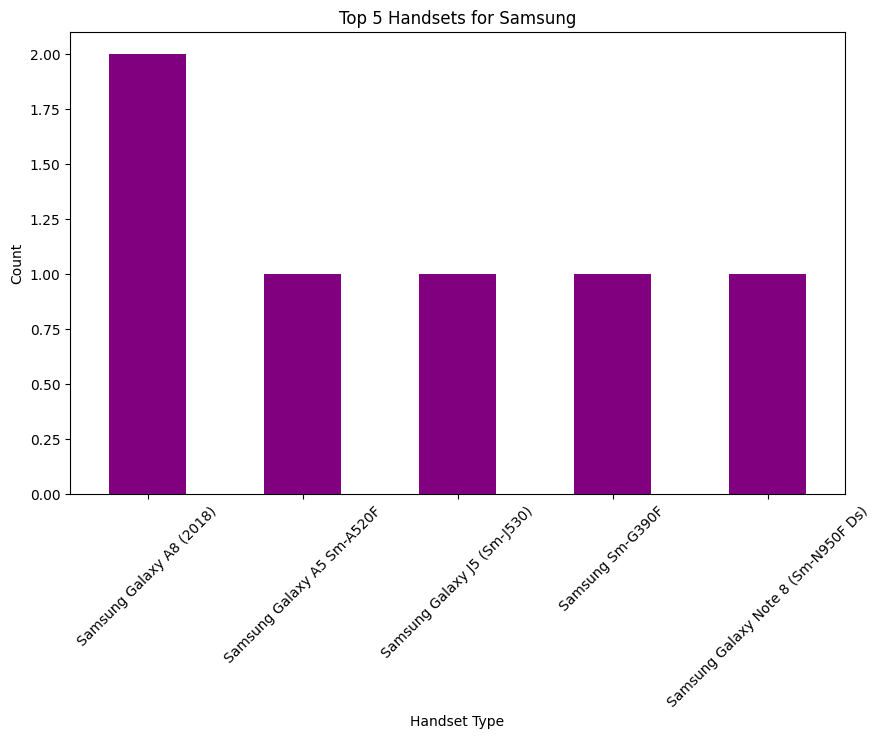

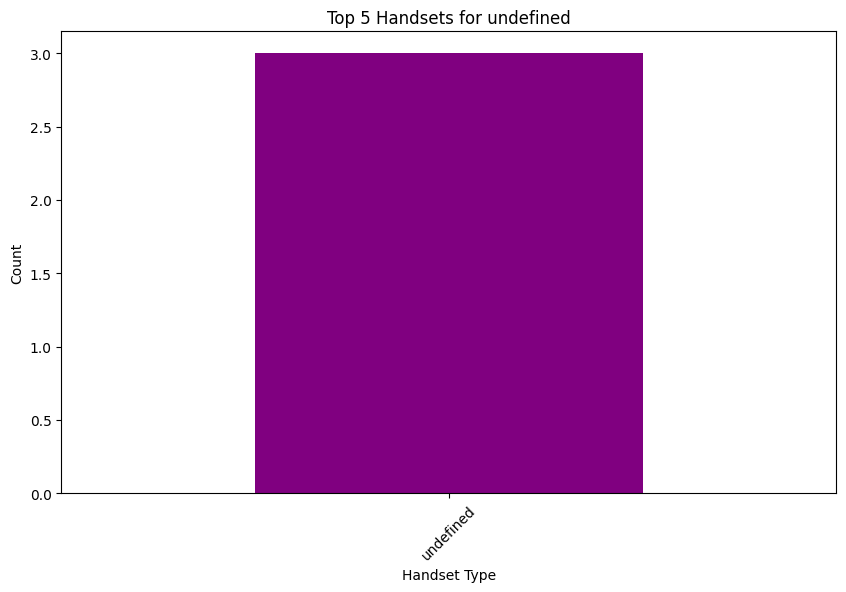

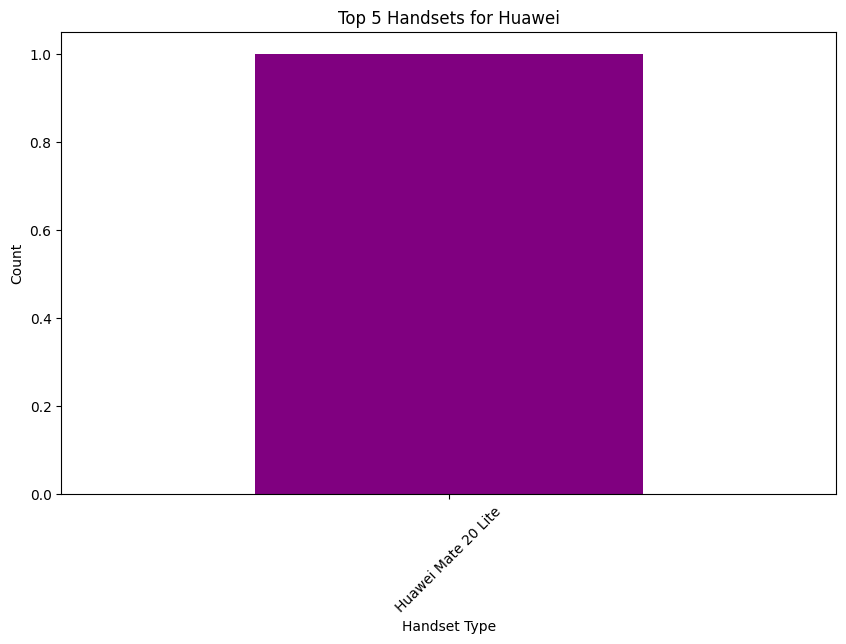

{'Samsung': Handset Type
Samsung Galaxy A8 (2018)               2
Samsung Galaxy A5 Sm-A520F             1
Samsung Galaxy J5 (Sm-J530)            1
Samsung Sm-G390F                       1
Samsung Galaxy Note 8 (Sm-N950F Ds)    1
Name: count, dtype: int64, 'undefined': Handset Type
undefined    3
Name: count, dtype: int64, 'Huawei': Handset Type
Huawei Mate 20 Lite    1
Name: count, dtype: int64}

Recommendation:
 Top 10 handsets are primarily dominated by Samsung, showing high brand loyalty.
Marketing efforts should focus on promoting high-demand models like undefined.
Additionally, targeting users of top manufacturers {', '.join(top_manufacturers.index)} could boost customer engagement.


In [8]:
user_analysis = TelecomUserOverview(cleaned_data)

# Aggregate user data and get the overview
aggregated_user_data = user_analysis.get_user_data_overview()

# Display aggregated data in a bar chart for total session duration
plt.figure(figsize=(10, 6))
sns.barplot(x='IMSI', y='total_session_duration', data=aggregated_user_data, color='blue')
plt.title('Total Session Duration per User')
plt.xlabel('User (IMSI)')
plt.ylabel('Total Session Duration (ms)')
plt.xticks(rotation=45)
plt.show()

# Bar plot for total data volume per user
plt.figure(figsize=(10, 6))
sns.barplot(x='IMSI', y='total_data_volume', data=aggregated_user_data, color='green')
plt.title('Total Data Volume per User')
plt.xlabel('User (IMSI)')
plt.ylabel('Total Data Volume (Bytes)')
plt.xticks(rotation=45)
plt.show()

# Call methods for handset analysis
top_10_handsets = user_analysis.top_10_handsets()
top_3_manufacturers = user_analysis.top_3_manufacturers()
top_5_handsets_per_manufacturer = user_analysis.top_5_handsets_per_top_3_manufacturers()
recommendation = user_analysis.make_recommendation()

# Bar plot for top 10 handsets
plt.figure(figsize=(10, 6))
top_10_handsets.plot(kind='bar', color='orange')
plt.title('Top 10 Handsets Used by Customers')
plt.xlabel('Handset Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Pie chart for top 3 manufacturers
plt.figure(figsize=(8, 8))
top_3_manufacturers.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Top 3 Handset Manufacturers')
plt.ylabel('')
print(top_3_manufacturers)
plt.show()

# Bar plot for top 5 handsets per top 3 manufacturers
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    plt.figure(figsize=(10, 6))
    handsets.plot(kind='bar', color='purple')
    plt.title(f'Top 5 Handsets for {manufacturer}')
    plt.xlabel('Handset Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Display recommendation
print(top_5_handsets_per_manufacturer)
print("\nRecommendation:\n", recommendation)

# Exploratory data analysis

===== Section 1: Describe Variables =====
Dataset columns and their data types:
Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)      

c:\Users\wubeshet.abera\Projects\Ten-Academy\Telecom-User-Analysis-Insights\scripts\eda_analysis.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_data_per_decile.index, y=total_data_per_decile.values, palette='Blues_d')


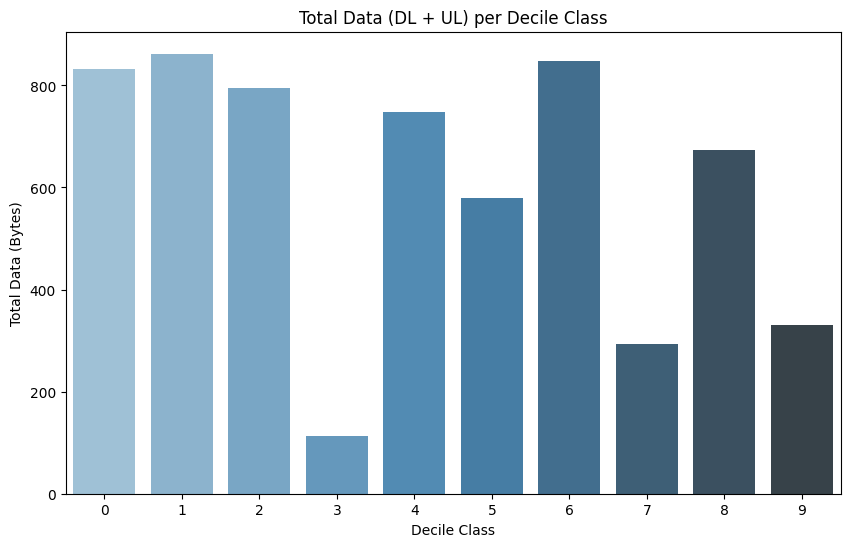


===== Section 3: Analyze Basic Metrics =====
          Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)
count  1.000000e+01         10.000000         10.000000
mean   1.182834e+06        569.323184         38.349909
std    2.887791e+05        269.299231         10.947348
min    8.644820e+05         67.293212         21.379447
25%    9.722842e+05        356.621145         30.439616
50%    1.081824e+06        671.309079         38.578968
75%    1.351699e+06        789.984687         44.608106
max    1.823652e+06        821.697484         56.088463


<Figure size 1200x800 with 0 Axes>

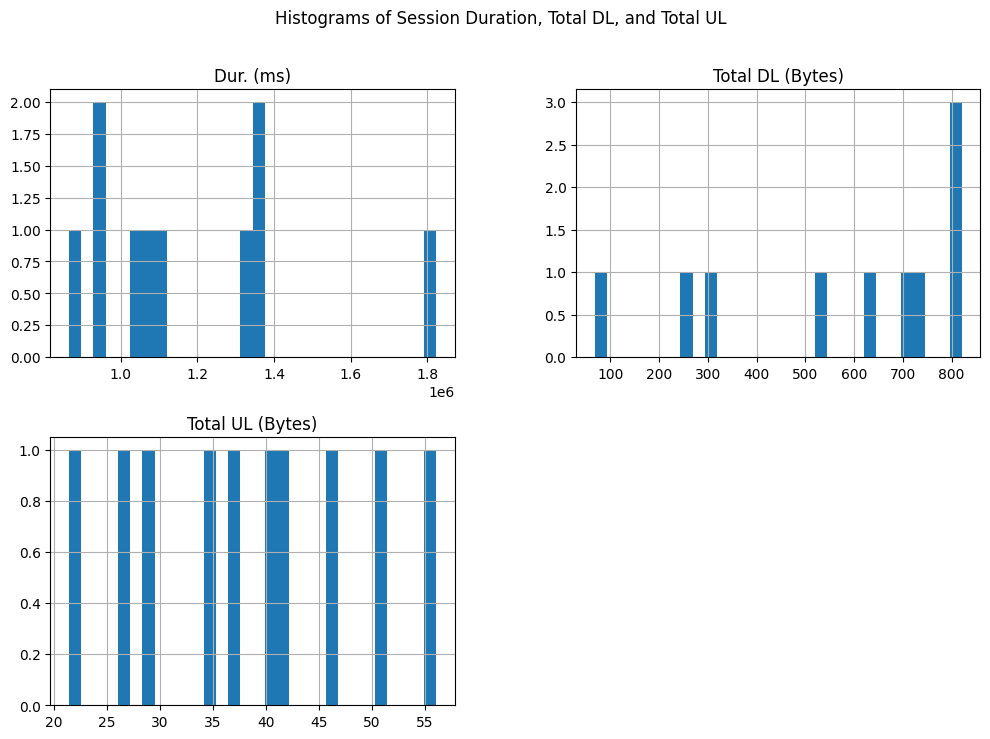


===== Section 4: Compute Dispersion Parameters =====
Variance:
 Dur. (ms)           8.339339e+10
Total DL (Bytes)    7.252208e+04
Total UL (Bytes)    1.198444e+02
dtype: float64

Standard Deviation:
 Dur. (ms)           288779.130492
Total DL (Bytes)       269.299231
Total UL (Bytes)        10.947348
dtype: float64

===== Section 5: Univariate Analysis (Box Plots) =====


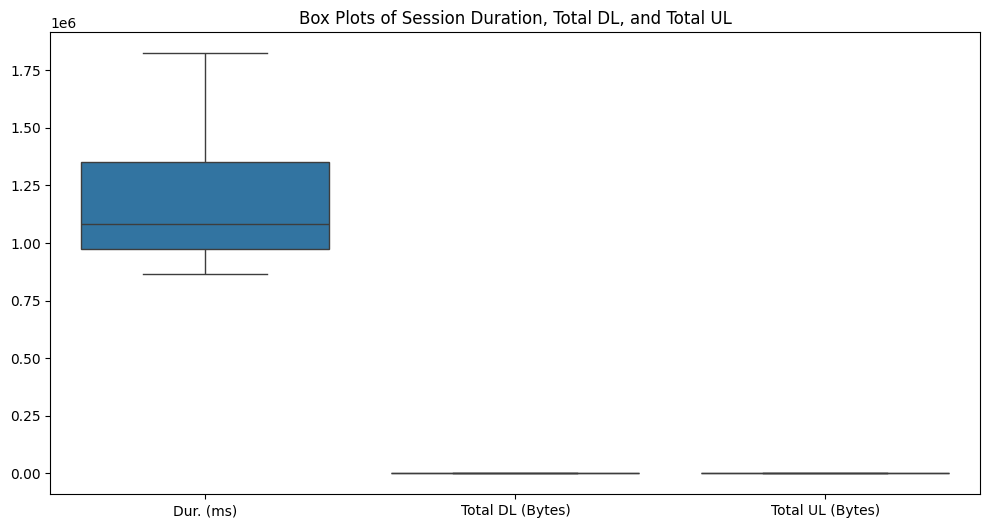


===== Section 6: Bivariate Analysis (Application Usage vs Total Data) =====


AttributeError: 'EDAAnalysis' object has no attribute 'bivariate_analysis'

In [13]:
# Assuming 'cleaned_data' is your DataFrame
eda = EDAAnalysis(cleaned_data)

# Section 1: Describe Variables
print("===== Section 1: Describe Variables =====")
eda.describe_variables()

# Section 2: Segment Users by Decile and Compute Total Data
print("\n===== Section 2: Segment Users by Decile and Compute Total Data =====")
eda.segment_users_by_decile()

# Section 3: Analyze Basic Metrics
print("\n===== Section 3: Analyze Basic Metrics =====")
eda.analyze_basic_metrics()

# Section 4: Compute Dispersion Parameters
print("\n===== Section 4: Compute Dispersion Parameters =====")
eda.compute_dispersion_parameters()

# Section 5: Univariate Analysis (Box Plots)
print("\n===== Section 5: Univariate Analysis (Box Plots) =====")
eda.plot_univariate_analysis()

# Section 6: Bivariate Analysis (Application Usage vs Total Data)
print("\n===== Section 6: Bivariate Analysis (Application Usage vs Total Data) =====")
eda.bivariate_analysis()

# Section 7: Correlation Analysis
print("\n===== Section 7: Correlation Analysis =====")
eda.correlation_analysis()

# Section 8: PCA Analysis (Dimensionality Reduction)
print("\n===== Section 8: PCA Analysis (Dimensionality Reduction) =====")
eda.pca_analysis()
